In [1]:
# importando os dados
import pandas as pd

path = r'/home/lapisco/Desktop/ica/ICA/Dados/datasets/artificial/chess/data.csv'
data = pd.read_csv(path)

data = pd.DataFrame(data)
data

,45,117,2
0,189,46,1
1,49,5,1
2,179,101,1
3,57,40,1
4,116,104,2
...,...,...,...
4994,72,63,2
4995,1,179,1
4996,184,95,2
4997,6,50,1


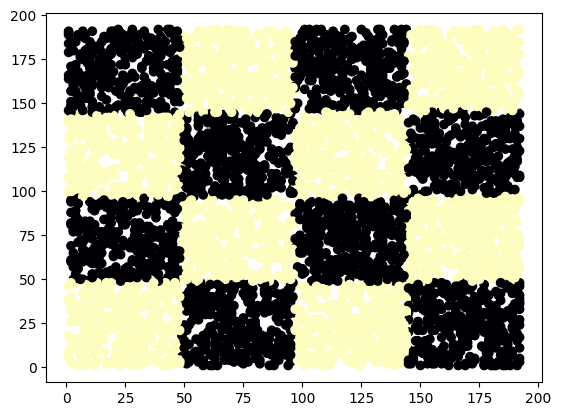

In [3]:
import matplotlib.pyplot as plt

plt.scatter(x = data['45'], y = data['117'], c=data['2'], cmap = 'magma')

In [4]:
# Pré-processamento
#   Normalizando os dados

from sklearn.preprocessing import MinMaxScaler

normalizador = MinMaxScaler()
normalizador.fit(data)

dados_normalizados = pd.DataFrame(normalizador.transform(data), columns = data.columns)
dados_normalizados.head()

X = dados_normalizados.drop(columns='2')
y = dados_normalizados['2']

XB = data.drop(columns='2')
yB = data['2']

In [5]:
# Separando os dados para o treinamento

from sklearn.model_selection import train_test_split

X_trainB, X_testB, y_trainB, y_testB = train_test_split(XB, yB, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Para mostrar as metricas

def metricas(matriz_confusao):
    VP, FN = matriz_confusao[0]
    FP, VN = matriz_confusao[1]
    sensibilidade = VP/(VP+FN)
    especificidade =VN/(FP+VN)
    acuracia = (VP + VN)/(VP+FN+FP+VN)
    return [sensibilidade, especificidade, acuracia]
    

In [7]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100,100), max_iter=1000, solver='adam')
mlp.fit(X_train, y_train)
predi = mlp.predict(X_test)


mlpB = MLPClassifier(hidden_layer_sizes=(100,100), max_iter=1000, solver='adam')
mlpB.fit(X_trainB, y_trainB)
prediB = mlpB.predict(X_testB)

# Matriz de confusão para calcular as métricas
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, predi)

array([[483,   4],
       [ 30, 483]])

In [8]:
confusion_matrix(y_testB, prediB)

array([[269, 218],
       [134, 379]])

In [9]:
metrics = metricas(confusion_matrix(y_test, predi))
metricsB = metricas(confusion_matrix(y_testB, prediB))

print('MLP COM DADOS PRÉ-PROCESSADOS')
print('-'*20)
print(f'SENSIBILIDADE: {metrics[0]}; ESPECIFICIDADE: {metrics[1]};  ACURÁCIA: {metrics[2]}', '\n')

print('MLP COM DADOS BRUTOS')
print('-'*20)
print(f'SENSIBILIDADE: {metricsB[0]}; ESPECIFICIDADE: {metricsB[1]};  ACURÁCIA: {metricsB[2]}')


MLP COM DADOS PRÉ-PROCESSADOS
--------------------
SENSIBILIDADE: 0.9917864476386037; ESPECIFICIDADE: 0.9415204678362573;  ACURÁCIA: 0.966 

MLP COM DADOS BRUTOS
--------------------
SENSIBILIDADE: 0.5523613963039015; ESPECIFICIDADE: 0.7387914230019493;  ACURÁCIA: 0.648


In [10]:
from sklearn.naive_bayes import GaussianNB

naiveBayesGaussian = GaussianNB()
naiveBayesGaussian.fit(X_train, y_train)
prediNB = naiveBayesGaussian.predict(X_test)

naiveBayesGaussianB = GaussianNB()
naiveBayesGaussianB.fit(X_trainB, y_trainB)
prediNBB = naiveBayesGaussianB.predict(X_testB)

print(confusion_matrix(prediNB, y_test))

[[169 206]
 [318 307]]


In [11]:
print(confusion_matrix(prediNBB, y_testB))

[[169 206]
 [318 307]]


In [12]:
metrics = metricas(confusion_matrix(y_test, prediNB))
metricsB = metricas(confusion_matrix(y_testB, prediNBB))

print('NAIVE BAYES COM DADOS PRÉ-PROCESSADOS')
print('-'*20)
print(f'SENSIBILIDADE: {metrics[0]}; ESPECIFICIDADE: {metrics[1]};  ACURÁCIA: {metrics[2]}', '\n')

print('NAIVE BAYES COM DADOS BRUTOS')
print('-'*20)
print(f'SENSIBILIDADE: {metricsB[0]}; ESPECIFICIDADE: {metricsB[1]};  ACURÁCIA: {metricsB[2]}')

NAIVE BAYES COM DADOS PRÉ-PROCESSADOS
--------------------
SENSIBILIDADE: 0.3470225872689938; ESPECIFICIDADE: 0.5984405458089669;  ACURÁCIA: 0.476 

NAIVE BAYES COM DADOS BRUTOS
--------------------
SENSIBILIDADE: 0.3470225872689938; ESPECIFICIDADE: 0.5984405458089669;  ACURÁCIA: 0.476


In [13]:
from sklearn.svm import SVC

svc = SVC(kernel='rbf',C=5, gamma=0.1)

svc.fit(X_train, y_train)
prediSVC = svc.predict(X_test)



svcB = SVC(kernel='rbf',C=5, gamma=0.1)

svcB.fit(X_trainB, y_trainB)
prediSVCB = svcB.predict(X_testB)


print(confusion_matrix(prediSVC, y_test))

[[130 149]
 [357 364]]


In [14]:
print(confusion_matrix(prediSVCB, y_testB))

[[475  11]
 [ 12 502]]


In [15]:
metrics = metricas(confusion_matrix(y_test, prediSVC))
metricsB = metricas(confusion_matrix(y_testB, prediSVCB))

print('SVM RBF COM DADOS PRÉ-PROCESSADOS')
print('-'*20)
print(f'SENSIBILIDADE: {metrics[0]}; ESPECIFICIDADE: {metrics[1]};  ACURÁCIA: {metrics[2]}', '\n')

print('SVM RBF COM DADOS BRUTOS')
print('-'*20)
print(f'SENSIBILIDADE: {metricsB[0]}; ESPECIFICIDADE: {metricsB[1]};  ACURÁCIA: {metricsB[2]}')

SVM RBF COM DADOS PRÉ-PROCESSADOS
--------------------
SENSIBILIDADE: 0.2669404517453799; ESPECIFICIDADE: 0.7095516569200779;  ACURÁCIA: 0.494 

SVM RBF COM DADOS BRUTOS
--------------------
SENSIBILIDADE: 0.9753593429158111; ESPECIFICIDADE: 0.9785575048732943;  ACURÁCIA: 0.977


In [16]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

svc_pol = SVC(kernel='poly', C=5, gamma=2, degree=0)


svc_pol.fit(X_train, y_train)
prediSVC_poli = svc_pol.predict(X_test)

print(confusion_matrix(prediSVC_poli, y_test))



[[  0   0]
 [487 513]]


In [17]:
svc_polB = SVC(kernel='poly', C=5, gamma=2, degree=0)


svc_polB.fit(X_trainB, y_trainB)
prediSVC_poliB = svc_polB.predict(X_testB)


print(confusion_matrix(prediSVC_poliB, y_testB))

[[  0   0]
 [487 513]]


In [18]:
metrics = metricas(confusion_matrix(y_test, prediSVC_poli))
metricsB = metricas(confusion_matrix(y_testB, prediSVC_poliB))

print('SVM RBF COM DADOS PRÉ-PROCESSADOS')
print('-'*20)
print(f'SENSIBILIDADE: {metrics[0]}; ESPECIFICIDADE: {metrics[1]};  ACURÁCIA: {metrics[2]}', '\n')

print('SVM RBF COM DADOS BRUTOS')
print('-'*20)
print(f'SENSIBILIDADE: {metricsB[0]}; ESPECIFICIDADE: {metricsB[1]};  ACURÁCIA: {metricsB[2]}')

SVM RBF COM DADOS PRÉ-PROCESSADOS
--------------------
SENSIBILIDADE: 0.0; ESPECIFICIDADE: 1.0;  ACURÁCIA: 0.513 

SVM RBF COM DADOS BRUTOS
--------------------
SENSIBILIDADE: 0.0; ESPECIFICIDADE: 1.0;  ACURÁCIA: 0.513


In [19]:
from sklearn.svm import SVC

svc_lin = SVC(kernel='linear', C=9, gamma=5, degree=4)


svc_lin.fit(X_train, y_train)
prediSVC_lin = svc_lin.predict(X_test)

print(confusion_matrix(prediSVC_lin, y_test))

[[203 258]
 [284 255]]


In [20]:
metrics = metricas(confusion_matrix(prediSVC_lin, y_test))
print(f'SENSIBILIDADE: {metrics[0]}; ESPECIFICIDADE: {metrics[1]};  ACURÁCIA: {metrics[2]}')

SENSIBILIDADE: 0.4403470715835141; ESPECIFICIDADE: 0.47309833024118736;  ACURÁCIA: 0.458
